<h1 style="text-align: center; color: green;">Statistical Methods for Social Sciences</h1>


### Table of Contents

- Normal Distribution (Z-Score, p-value)
- Z-Score
- Statistical Significance Null Hypothesis Tests 
- Sample Proportion Test (Z-Score)
- <p style="color: red;"> Test of difference between means (t-score)
- <p style="color: red;"> Paired (dependent) t-test: comparing the same sample twice (*two formulas – the same result)
- <p style="color: red;"> (One-Way) ANOVA (+ ANOVA Table)
- <p style="color: red;"> Chi-Square Distribution test for Contingency Tables analysis
- <p style="color: red;"> Simple Linear Regression (Ordinary Least Squares)

### Dependency Modules
Run the cell below first.

In [1]:
# using Pkg; Pkg.add(["Statistics", "Plots", "Distributions", "StatsPlots"])
using Statistics;
using Plots;
using Distributions;
using StatsPlots;

## Normal Distribution

Normal (Gaussian) Distribution is noted as $\mathcal{N}(\mu,\sigma^2)$ where $\mu$ is mean and $\sigma^2$ is variance of the distribution.

Its probability density function is 
### $f(x) = \frac{1}{\sigma \sqrt{2\pi} } e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$


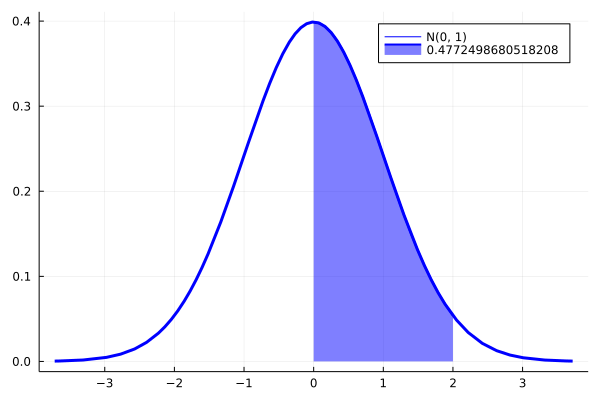

In [2]:
function Normal_Integral(μ::Real, σ::Real, range::Vector; visualize::Bool=false)
    Normal_pdf(x) = ( 1/( σ*sqrt(2π) ) ) * exp( -0.5*( ( (x.-μ)/σ ).^2 ) )
    
    x = collect(range[begin]:0.1:range[end])
    y = []
    
    for xᵢ in x
        yᵢ = Normal_pdf(xᵢ)
        push!(y, yᵢ)
    end
    
    distribution = Normal(μ, σ)
    
    
    if visualize
        plot(distribution, lc=:blue, lw=3, label=( "N($μ, $σ)" ))
        x_subrange = x[findall(x->x==range[1], x)[1]:findall(x->x==range[2], x)[1]]
        y_subrange = y[findall(x->x==range[1], x)[1]:findall(x->x==range[2], x)[1]]
        cdf_zvalues = cdf.(distribution, [range[1], range[2]])
        plot!(x_subrange, y_subrange, lw=2, lc=:blue, fillrange=0, fillalpha=0.5, fillcolor=:blue, labels=(cdf_zvalues[2]-cdf_zvalues[1]))
    else
        cdf(distribution, range[end]) - cdf(distribution, range[begin])
    end
    
end

Normal_Integral(0, 1, [0, 2], visualize=true)


In [3]:
# Sample Z Proportion test

# Two subsets [n, N]
# male: 81 out of 180 men have luxurious car
# subset1 = [46, 120]
subset1 = [10, 100]
# female: 48 out of 150 women have luxurious car
# subset2 = [58, 170]
subset2 = [3, 70]

# proportion of subsets
p1 = subset1[1]/subset1[2]
p2 = subset2[1]/subset2[2]

#= "if we have a sample and we would like to find out if the proportions are different, 
we have to divide the difference between proportions 
by the standard error of the difference in proportions" =#

# Combined sample proportion
p = (subset1[2]*p1 + subset2[2]*p2)/(subset1[2] + subset2[2])

# The standard error of the difference in proportions
se_p1p2 = sqrt(p*(1-p)*((subset1[2] + subset2[2])/(subset1[2] * subset2[2])))

z = (p1 - p2)/se_p1p2

1.3797929755659044

In [4]:
# Test of difference between means

x1 = [76, 76, 44, 50, 88, 75, 72, 62, 53, 57, 57, 60, 80, 53, 82, 80, 56, 61, 44, 49, 60, 44, 85, 69, 47, 54, 85]
x2 = [36, 35, 45, 38, 40]

# number of observations
# N1 = 11
# N2 = 9
N1 = length(x1)
N2 = length(x2)
# degrees of freedom
df = N1+N2-2
# means
# x1_mean = 13.636
# x2_mean = 9.444
x1_mean = mean(x1)
x2_mean = mean(x2)
# standard deviations
# sigma1 = 2.46
# sigma2 = 2.186
sigma1 = std(x1)
sigma2 = std(x2)

# Standard error of difference between means
se = sqrt(((N1*sigma1^2 + N2*sigma2^2)/df)*(1/N1+1/N2))

# t-value
t = (x1_mean - x2_mean)/se


3.7624651076173046

In [5]:
# Paired (dependent) t-test: comparing the same sample twice (i.e. before-after)
# Two samples (must be the same size, obviously)
x1 = [92.08, 83.56, 79, 78, 71, 70, 64.7, 64, 52, 53.1, 17.9, 82.49, 93]
x2 = [98, 92.52, 88.13, 91.28, 88.5, 82.85, 81.76, 99.15, 80.37, 99.65, 62.55, 89.61, 99.01]


# Number of observations
N = length(x1)

# Standard deviation of difference between means
s_diff = sqrt( sum( (x1 .- x2).^2 )/N - (mean(x1) - mean(x2))^2 )

# Standard error of mean difference
se_mean_diff = s_diff/sqrt(N-1)

# t-value = difference in means divided by standard error of mean difference
t = (mean(x1) - mean(x2))/se_mean_diff


-4.834594918796004

In [6]:
# The same as above but formulas from Agresti 2018 p. 192
# The difference is because mean( x1 .- x2 ) ≈ mean(x1) - mean(x2)
# Paired (dependent) t-test: comparing the same sample twice (e.g. before-after)
# Two samples (must be the same size, obviously)
x1 = [604, 556, 540, 522, 459, 544, 513, 470, 556, 531, 599, 537, 619, 536, 554, 467, 525, 508, 529, 470, 512, 487, 515, 499, 448, 558, 589, 814, 519, 462, 521, 543]
x2 = [636, 623, 615, 672, 601, 600, 542, 554, 543, 520, 609, 559, 595, 565, 573, 554, 626, 501, 574, 468, 578, 560, 525, 647, 456, 688, 679, 960, 558, 482, 527, 536]

# number of observation
n = length(x1)

# sample mean of difference scores
y_mean_diff = mean( x1 .- x2 )

# sample standard deviation of the difference scores
sd = std( x1 .- x2 )

# standard error
se = sd/sqrt(n)

# t-value (p. 192)
t = (y_mean_diff - 0)/se


-5.456300665835772

In [7]:
# ANOVA
# Example: satisfaction with life (widowed, divorced, married, never married), max = 6
# grouped_data = [[1, 0, 0, 2, 0], [3, 1, 2, 2, 1], [4, 6, 2, 5, 6], [5, 6, 4, 2, 5]] # example
grouped_data = [[40, 94, 40, 13, 290, 23, 16, 54, 242, 404, 60], 
                [32, 21, 15, 23, 313, 42, 8, 51, 442, 245, 8], 
                [62, 34, 26, 15, 767, 9, 21, 76, 630, 786, 54],  
                [113, 25, 142, 86, 975, 28, 57, 22, 1118, 915, 108]]

grand_mean = sum(vcat(grouped_data...))/length(vcat(grouped_data...))
group_means = [sum(i)/length(i) for i in grouped_data]

# Sum of Squares Between
SSB = sum([length(grouped_data[i]) * (group_means[i] - grand_mean)^2 for i in 1:length(grouped_data)])

# Sum of Squares Within
# SSW = SST - SSB
SSW = sum([sum([(grouped_data[i][j] - group_means[i])^2 for j in 1:length(grouped_data[i])]) for i in 1:length(grouped_data)])

# Sum of Squares Total
SST = sum([(i - grand_mean)^2 for i in vcat(grouped_data...)])
# SST = sum([(i - grand_mean)^2 for i in hcat(grouped_data...)]) # fix for vectors of different size


# Check statement
# round(SSW, digits=2) + round(SSB, digits=2) == round(SST, digits=2)

# Mean Squares (Mean Variances) + degrees of freedom
# Mean Squares Between (explained variance / Factor)
df_between = length(grouped_data) - 1
MSB = SSB/df_between
# Mean Squares Within (unexplained variance / Error)
df_within = length(vcat(grouped_data...)) - length(grouped_data)
MSW = SSW/df_within

# The F Ratio
F = MSB/MSW
p = ccdf(FDist(df_between, df_within), F)

alpha = 0.05 # 5%

# One-Tailed Comparison
F_critical = quantile(FDist(df_between, df_within), 1-alpha)
F, p
# if F > F_critical
#     "reject the null hypothesis"
# else
#     "fail to reject the null hypothesis (e.g. no effect)"
# end


(1.3751314764212705, 0.26424047537992895)

In [8]:
# ANOVA Table
using DataFrames # use PrettyTables.jl instead?

anova_table = DataFrame(Source = ["Factor (b)", "Error (w)", "Total"], 
    df = [df_between, df_within, df_between+df_within], 
    SS = [SSB, SSW, SST], 
    MS = [MSB, MSW, ""], 
#     F = F, 
    F = [F, "", ""], 
    P = [p, "", ""],
    )


,Source,df,SS,MS,F,P
,String,Int64,Float64,Any,Any,Any
1,Factor (b),3,3.49567e5,1.16522e5,1.37513,0.26424
2,Error (w),40,3.38942e6,84735.5,,
3,Total,43,3.73899e6,,,


In [9]:
# Chi-Square Distribution test for Contingency Tables analysis

# Observed table
# o = [1 12 3 1
#      1 8 17 2
#     1 12 41 4
#     0 0 2 4]
o = [338 156 
     363 125]
# Turn matrix numbers into floats
o = Float64.(o)

# Declare Expected table
# e::Matrix
e = copy(o)

# Calculate Expected table
for i in 1:length(o[:, 1]), j in 1:length(o[1, :])
#     println(sum(o[i, :])*sum(o[:, j]) / sum(o))
    e[i, j] = sum(o[i, :])*sum(o[:, j]) / sum(o)
#     println((i, j))
#     println(e[i, j])
end


# Chi squared value
chisq = sum((o-e) .^2 ./ e)


# Deegrees of freedom
df = prod(size(o) .- 1)


# p-value
p = ccdf(Chisq(df), chisq)


# Critical chi squared value
chisq_critical = quantile(Chisq(df), 1-0.05)


# Yates Continuity Correction. If ΣOᵢ < 20
chisq_yates = sum((o-e .-0.5) .^2 ./ e)


# ϕ-coefficient
ϕ = √(chisq/sum(o))
# ϕ = (10*10.0-40*40.0)/√(50*50*50*50)
function phi(matrix::Array{Float64, 2})
    a, b, c ,d = matrix[1, 1], matrix[1, 2], matrix[2, 1], matrix[2, 2]
    ϕ = (b*c - a*d)/√((a+b)*(c+d)*(a+c)*(b+d))
end


# Yule's Q
# Q = (bc-ad)/(bc+ad)
function YulesQ(matrix::Array{Float64, 2})
    a, b, c ,d = matrix[1, 1], matrix[1, 2], matrix[2, 1], matrix[2, 2]
    Q = (b*c - a*d)/(b*c + a*d)
end


# Cramér's V
# SOMETHING WRONG WITH SQUARE ROOT IN FORMULA???
V = sqrt(chisq / (sum(o) * min( length(o[1, :])-1, length(o[:, 1])-1 )))
function CramersV(matrix::Matrix{Float64})
    V = √(chisq / (sum(matrix) * min( length(matrix[1, :])-1, length(matrix[:, 1])-1 )))
end


(chisq=chisq, df, chisq_yates, p, chisq_critical, ϕ,)


#= TODO: 
Fisher's exact test?
=#


(chisq = 4.2750119941448, df = 1, chisq_yates = 4.280760438571684, p = 0.03867669091137144, chisq_critical = 3.8414588206941245, ϕ = 0.0659800932311793)

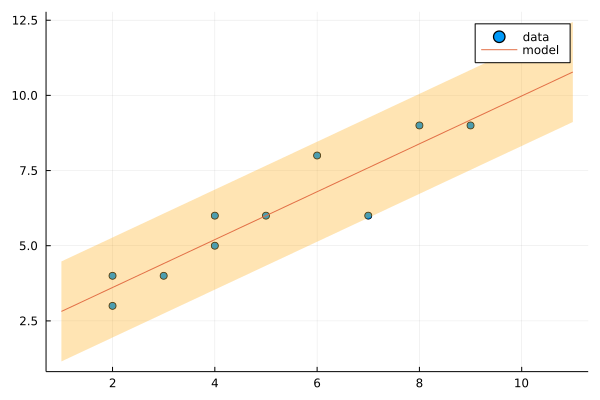

In [10]:
# Simple Linear Regression
# ŷ = a + bx

x = [2, 5, 3, 7, 2, 6, 4, 9, 8, 4]
y = [3, 6, 4, 6, 4, 8, 6, 9, 9, 5]
# x = [162, 150, 174]
# y = [65, 70, 75]

# Regression Estimators (Coefficients)
b = sum( (x .- mean(x)) .* (y .- mean(y)) ) / sum( (x .- mean(x)).^2 )
a = mean(y) - b * mean(x)
# Regression Function
line(x) = a + b*x

# Sum of Square Error (Residuals)
SSE = sum( (y .- (a .+ b .* x)).^2 )
# Total Sum of Squares
SST = sum( (y .- mean(y)).^2 )
# Regression Sum of Squares
SSR = sum( ((a .+ b.*x) .- mean(y)).^2 )

# Estimated conditional standard deviation
s = √(SSE/(length(x)-2))

# Confidence Interval, alpha=0.05 => Z = 1.96
CI = 1.96*s
# CI = 2*s

# Correlation Coefficient
r = sum( (x .- mean(x)) .* (y .- mean(y)) ) / √( (sum( (x .- mean(x)).^2 ) * sum( (y .- mean(y)).^2 ) ) )

# t-statistic for Correlation; H₀: no correlation (ρ = 0); Hₐ: correlation exists
t = r/√((1-r^2)/(length(x)-2))

# t-statistic for statistical independence between x and y; H₀: β = 0; Hₐ: β ≠ 0
se_b = s/√(sum( (x .- mean(x)).^2 )) # standard error of b
t = b/se_b

scatter(x, y, label="data")
plot!(line, min(x...)-1, max(x...)+2, 
    ribbon=CI,
    fillcolor=:orange,
    fillalpha=0.3,
    label="model")

# a, b, SSE, s
# (7.593 - CI, 7.593 + CI)
# SST, SSR, SSE
# r, t
# r^2 ≈ (SST-SSE)/SST


#= TODO:
ANOVA Table for Regression
=#